# Introduction
This project demonstrates the data wrangling process for analyses of the twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. I will gather, assess, clean the data and store the cleaned data, and use the cleaned data to answer some questions. However, the main objective of this project, is to demonstrate my data wrangling skills.

## Importing Python Modules
Let's import all the modules required.

In [1]:
import pandas as pd
import numpy as np
import requests 
import os
import tweepy
import json
from functools import reduce
import matplotlib.pyplot as plt

## Gathering Data

##### Loading in the 'twitter-archive-enhanced' csv file.

In [2]:
# Loading the WeRateDogs Twitter archive on jupyter notebook.
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')
#testing if the data has been loaded
tweet_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


##### Downloading and loading the image predictions TSV file.

In [3]:
# Downloading the Image Predictions TSV file.
with requests.get(' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv') as rsp:
    with open('image_predictions.tsv', 'wb') as file:
        file.write(rsp.content)
        rsp.close()
        
image_pd = pd.read_csv('image_predictions.tsv', sep = '\t')
#checking if the tsv file was successfully loaded
image_pd.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


##### Gathering data from Twitter's API

In [4]:
#Setting API Authentication/Access
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# For loop to write each tweet found into a new line of tweet-json.txt
with open('tweets_found_json.txt', 'a', encoding='utf8') as f:
    for tweets in tweet_archive['tweet_id']:
        try:
            tweet = api.get_status(tweets, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [ ]:
tweet_list = []

# Reading each line in the json txt file into a list of dictionaries
for eachline in open('tweets_found_json.txt', 'r'):
    tweets_data = json.loads(eachline)
    tweet_list.append({'tweet_id': tweets_data['id_str'],
                        'retweet_count': tweets_data['retweet_count'],
                        'favorite_count': tweets_data['favorite_count'],
                        'followers_count': tweets_data['user']['followers_count'],
                        'retweeted': tweets_data['retweeted'],
                        'source' : tweets_data['source'],
                        'created_at':tweets_data['created_at']})
    

In [ ]:
# Converting the list of dictionaries to a pandas DataFrame
df_tweet = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count', 'retweeted', 'source','created_at'])

In [ ]:
#Saving the dataframe of the data extracted from the API to a csv file.
df_tweet.to_csv('tweet_api_df.csv', index=False)

In [4]:
#Reading in the twitter api data stored in a csv file.
df_api = pd.read_csv('tweet_api_df.csv')


## Assessing Data

##### Assessing The Archive Dataframe

In [5]:
#Visually assessing the archive dataframe (tweet_archive)
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
# Checking all the names
tweet_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [8]:
#Visually asessing the Image Predictions File (image_pd)
image_pd

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
image_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
#Visually assessing the additional data extracted from Twitter's API
df_api

,tweet_id,retweet_count,favorite_count,followers_count,retweeted,source,created_at
0,892420643555336193,7002,33800,9300828,False,"<a href=""http://twitter.com/download/iphone"" r...",Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5298,29312,9300828,False,"<a href=""http://twitter.com/download/iphone"" r...",Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3477,22041,9300828,False,"<a href=""http://twitter.com/download/iphone"" r...",Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7222,36922,9300828,False,"<a href=""http://twitter.com/download/iphone"" r...",Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,7754,35296,9300828,False,"<a href=""http://twitter.com/download/iphone"" r...",Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...,...,...,...
2320,666049248165822465,37,89,9300798,False,"<a href=""http://twitter.com/download/iphone"" r...",Mon Nov 16 00:24:50 +0000 2015
2321,666044226329800704,115,247,9300798,False,"<a href=""http://twitter.com/download/iphone"" r...",Mon Nov 16 00:04:52 +0000 2015
2322,666033412701032449,36,100,9300798,False,"<a href=""http://twitter.com/download/iphone"" r...",Sun Nov 15 23:21:54 +0000 2015
2323,666029285002620928,39,112,9300798,False,"<a href=""http://twitter.com/download/iphone"" r...",Sun Nov 15 23:05:30 +0000 2015


In [11]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2325 non-null   int64 
 1   retweet_count    2325 non-null   int64 
 2   favorite_count   2325 non-null   int64 
 3   followers_count  2325 non-null   int64 
 4   retweeted        2325 non-null   bool  
 5   source           2325 non-null   object
 6   created_at       2325 non-null   object
dtypes: bool(1), int64(4), object(2)
memory usage: 111.4+ KB


In [12]:
#Checking if there are any retweets on the data gathered from the API
#The column 'retweeted' tells us this, if set to False then its an original tweets, if set to True then its a retweet
df_api.retweeted.value_counts()

False    2325
Name: retweeted, dtype: int64

### Quality Assessment
#### Archive Dataframe
###### Define
* The source is embeded in a url, rather than plain and easy to understand string (i.e 'Twitter for iphone').
* According to the project rubrics we need only original tweets, so we have to remove the retweets.
* Some text in the name column are not actually names, so  we drop them, including 'None' and null Values.
* Drop irrelevant column: columns in regards to replies, retweeted status columns after removing retweets.
* Change datatype of the tweet_id column to string for merging.

#### Image Prediction
###### Define
* drop irrelevant coluumn: img_num
* Select only rows whose p1_dog,p2_dog,p3_dog is set to True, to show only actual dog breeds.
* change datatype of tweet_id column to string for merging
* Rename the p1,p2,p3 columns to p1_dog-breed,p2_dog-breed,p3_dog-breed for better labelling
* Only provides 2075 image data against the total of 2356 records in the twitter archive.

#### Twitter API
###### Define
* Provides additional data for only 2325 rows against the total of 2356 rows in the twitter archive.
* Change datatype of the tweet_id to string for merging.
* There's need to drop source column because there is already a source column on the twitter archive dataframe, which happens to contain more records.



### Tidyness Assessment
* The different dog stages are in different columns, we should merge them.
* The data gathered from the twitter archive, image prediction and twitter API should be merged into a master dataset.

### Quality Issues with the merged master set
* Remove white space and null values from the name column and the 'p1_dog-breed' columns


# Cleaning Data


In [13]:
#Making copies of the original dataframes, so we can use them to hold cleaned data.
clean_archive = tweet_archive.copy()
clean_image = image_pd.copy()
clean_api = df_api.copy()

## Twitter Archive 

> ## Quality Issues

### Define
* The source is embeded in a url string, rather than plain and easy to understand string (i.e 'Twitter for iphone').
### Code

In [14]:
clean_archive.source = clean_archive.source.str.extract('>([\w\W\s]*)<', expand=True)

 ### Test

In [15]:
clean_archive.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Define
* According to the project rubrics we need only original tweets, so we have to remove the retweets.
### Code

In [16]:
clean_archive = clean_archive[pd.isnull(clean_archive['retweeted_status_id'])]


### Test 

In [17]:
print(clean_archive['retweeted_status_id'].sum())
print(clean_archive['retweeted_status_user_id'].sum())

0.0
0.0


### Define
* Drop irrelevant column: columns in regards to replies, retweeted status columns after removing retweets.
### Code

In [18]:
irr_arch_col = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id']
clean_archive.drop(irr_arch_col, axis = 1, inplace = True)

### Test

In [19]:
clean_archive.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Define
* Some text in the name column are not actually names, so we drop them, including 'None' and null Values.
### Code

In [20]:
# Selecting only actual names(i.e those that starts and ends with alphabets)
clean_archive.name = clean_archive.name.str.replace('^[a-z]+','', regex=True)
# Excluding names tagged 'None' or 'none'  in the name columns if any, (i.e selecting everything other than 'None')
clean_archive = clean_archive[clean_archive.name != 'None']
clean_archive = clean_archive[clean_archive.name != 'none']
# Dropping Null Values in the name column
clean_archive = clean_archive.dropna(subset=['name'])

### Test

In [21]:
clean_archive.name.value_counts()

              104
Charlie        11
Lucy           11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

### Define 
* Change datatype of the tweet_id column to string for merging.
### Code

In [22]:
clean_archive.tweet_id = clean_archive.tweet_id.astype(str)

### Test

In [23]:
clean_archive.tweet_id.info()

<class 'pandas.core.series.Series'>
Int64Index: 1495 entries, 0 to 2354
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
1495 non-null   object
dtypes: object(1)
memory usage: 23.4+ KB


> ## Tidyness Issues 
### Define
* The different dog stages are in different columns, let's put them in one column
### Code

In [24]:
clean_archive['stages'] = clean_archive.doggo + clean_archive.floofer + clean_archive.pupper + clean_archive.puppo

In [25]:
clean_archive['stages'].value_counts()

NoneNoneNoneNone       1297
NoneNonepupperNone      132
doggoNoneNoneNone        40
NoneNoneNonepuppo        16
NoneflooferNoneNone       5
doggoNonepupperNone       5
Name: stages, dtype: int64

In [26]:
# Creating a function to assign dog stage
def assign_stage(clean_archive):
    if clean_archive['stages'].count('None') == 2:
        return 'Multiple_stages' 
    # This code above assign's 'multiple_stages' to dogs in two stages, as we can see from the value counts, only when there are two 'nones' can there be two stages.
    else:
        if clean_archive['stages'].count('doggo') == 1:
            return 'Doggo'
        elif clean_archive['stages'].count('floofer') == 1:
            return 'Floofer'
        elif clean_archive['stages'].count('pupper') == 1:
            return 'Pupper'
        elif clean_archive['stages'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

clean_archive['stages'] = clean_archive.apply(assign_stage, axis=1)
          

In [27]:
# Dropping the now irrelevant seperate dog stages columns:Pupper, Doggo, Puppo, and Floofer
drop_stage_cols = ['pupper', 'doggo', 'puppo', 'floofer']
clean_archive.drop(drop_stage_cols, axis = 1, inplace=True)

In [28]:
# Excluding 'None' values from the dog stages
clean_archive = clean_archive[clean_archive.stages != 'None']

### Test

In [29]:
# Checking if the stages have been properly sorted and 'none' values removed.
clean_archive['stages'].value_counts()

Pupper             132
Doggo               40
Puppo               16
Floofer              5
Multiple_stages      5
Name: stages, dtype: int64

In [30]:
# Checking if the columns were dropped.
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 9 to 2017
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            198 non-null    object
 1   timestamp           198 non-null    object
 2   source              198 non-null    object
 3   text                198 non-null    object
 4   expanded_urls       198 non-null    object
 5   rating_numerator    198 non-null    int64 
 6   rating_denominator  198 non-null    int64 
 7   name                198 non-null    object
 8   stages              198 non-null    object
dtypes: int64(2), object(7)
memory usage: 15.5+ KB


## Image Prediction

> ## Quality Issues

### Define
* drop irrelevant coluumn: img_num
### Code


In [31]:
clean_image.drop('img_num', axis =1, inplace = True)

### Test

In [32]:
clean_image.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define
* Select only rows whose p1_dog,p2_dog,p3_dog is set to True, to show only actual dog breeds. (Note: p1_dog tells whether or not the 1st prediction is a breed of dog, if set to True, then its actually a dog breed)... Same applies to p2_dog,p3_dog.
### Code

In [33]:
clean_image = clean_image[((clean_image['p1_dog'] == True) & 
                  (clean_image['p2_dog'] == True) & 
                  (clean_image['p3_dog'] == True))]


### Test

In [34]:
print('p1_dog: ', clean_image.p1_dog.value_counts())
print('p2_dog: ', clean_image.p2_dog.value_counts())
print('p3_dog: ', clean_image.p3_dog.value_counts())

p1_dog:  True    1243
Name: p1_dog, dtype: int64
p2_dog:  True    1243
Name: p2_dog, dtype: int64
p3_dog:  True    1243
Name: p3_dog, dtype: int64


### Define 
* change datatype of tweet_id column to string for merging
### Code

In [35]:
clean_image.tweet_id = clean_image.tweet_id.astype(str)

### Test 

In [36]:
 clean_image.tweet_id.dtypes

dtype('O')

### Define 
* Rename the p1,p2,p3 columns to p1_dog-breed,p2_dog-breed,p3_dog-breed for better labelling
### Code

In [37]:
clean_image.rename(columns = {'p1':'p1_dog-breed', 'p2':'p2_dog-breed', 'p3':'p3_dog-breed'}, inplace = True)

In [38]:
clean_image.head(1)

,tweet_id,jpg_url,p1_dog-breed,p1_conf,p1_dog,p2_dog-breed,p2_conf,p2_dog,p3_dog-breed,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


## Twitter API

> ## Quality Issues

### Define
* change datatype of tweet_id column to string for merging
### Code

In [39]:
clean_api.tweet_id = clean_api.tweet_id.astype(str)

### Test

In [40]:
clean_api.tweet_id.dtypes

dtype('O')

### Define
* Drop source and created_at columns because there is already a source and timestamp columns on the twitter archive dataframe, which happens to contain more records.
### Code

In [41]:
clean_api.drop('source',axis = 1, inplace = True)
clean_api.drop('created_at', axis = 1, inplace = True)


### Test

In [42]:
clean_api.head(1)

,tweet_id,retweet_count,favorite_count,followers_count,retweeted
0,892420643555336193,7002,33800,9300828,False


## Tidyness Issue
### Define
* The data gathered from the twitter archive, image prediction and twitter API should be merged into a master dataset.
### Code

In [43]:
data_frames = [clean_archive, clean_image, clean_api]
df_master = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],
                                            how='outer'), data_frames)

### Quality Issues in the Master DataFrame
### Define
* There are white space values in the name column.
### Code

In [44]:
#checking all the value_counts
df_master.name.value_counts()

          14
Cooper     3
Boomer     2
Gus        2
Loki       2
          ..
Sophie     1
Huck       1
Anakin     1
Finley     1
Bubba      1
Name: name, Length: 174, dtype: int64

In [45]:
# Selecting everything other than white spaces
df_master = df_master[df_master.name != '']
# Dropping null values if any
df_master['name'].dropna(inplace=True)

### Test

In [46]:
# Checking if the white spaces have been removed
df_master.name.value_counts()

Cooper    3
Boomer    2
Gus       2
Loki      2
Bo        2
         ..
Sophie    1
Huck      1
Anakin    1
Finley    1
Bubba     1
Name: name, Length: 173, dtype: int64

### Define 
* Remove White spaces from the 'p1_dog-breed' column and drop null values

In [47]:

df_master = df_master[df_master['p1_dog-breed'] != '']
df_master['p1_dog-breed'].dropna(inplace=True)

In [48]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2337
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2324 non-null   object 
 1   timestamp           184 non-null    object 
 2   source              184 non-null    object 
 3   text                184 non-null    object 
 4   expanded_urls       184 non-null    object 
 5   rating_numerator    184 non-null    float64
 6   rating_denominator  184 non-null    float64
 7   name                184 non-null    object 
 8   stages              184 non-null    object 
 9   jpg_url             1236 non-null   object 
 10  p1_dog-breed        1236 non-null   object 
 11  p1_conf             1236 non-null   float64
 12  p1_dog              1236 non-null   object 
 13  p2_dog-breed        1236 non-null   object 
 14  p2_conf             1236 non-null   float64
 15  p2_dog              1236 non-null   object 
 16  p3_dog

In [49]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,jpg_url,...,p2_dog-breed,p2_conf,p2_dog,p3_dog-breed,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,retweeted
0,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,Doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,6094.0,27948.0,9300828.0,False
1,889531135344209921,2017-07-24 17:02:04 +0000,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,10.0,Stuart,Puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,...,Labrador_retriever,0.013834,True,redbone,0.007958,True,1878.0,13348.0,9300828.0,False
2,886366144734445568,2017-07-15 23:25:31 +0000,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12.0,10.0,Roscoe,Pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,...,Chihuahua,0.000361,True,Boston_bull,0.000076,True,2629.0,18537.0,9300828.0,False
3,884162670584377345,2017-07-09 21:29:42 +0000,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10.0,Yogi,Doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,...,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,2502.0,17924.0,9301222.0,False
4,883360690899218434,2017-07-07 16:22:55 +0000,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13.0,10.0,Grizzwald,Floofer,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,...,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True,3075.0,19936.0,9300828.0,False


## Storing The Cleaned Data

In [50]:
# Let's store the data we've cleaned into the a master dataframe called 'twitter_archive_master'
df_master.to_csv('twitter_archive_master.csv', index=False)

# Exploratory Data Analysis (EDA)
Using the data we've gathered and cleaned, let's draw insights and answer questions through analyses and visualization. The 'df_master' dataframe which is our wrangled dataset, would be used for this EDA.
Since this project is primarily for data wrangling, We'll be answering only 3 questions...
Insightful Questions:
* Which source is most popular?
* What are the top 10 most popular Dog Names?
* Which Dog breeds are liked the most?


### Question 1: What is most popular?
Let's the the source through used the most by using interacting with the @WeRateDogs tweets?

In [51]:
df_master.source.value_counts()

Twitter for iPhone     176
Vine - Make a Scene      7
TweetDeck                1
Name: source, dtype: int64

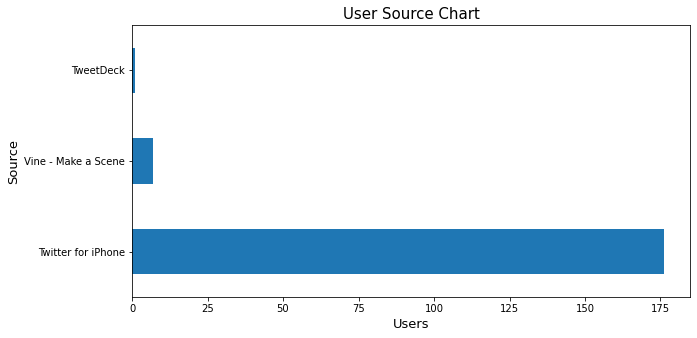

In [52]:
df_master.source.value_counts().plot(kind='barh', figsize = (10,5))
plt.xlabel('Users', size = 13)
plt.ylabel('Source', size = 13)
plt.title('User Source Chart', size=15);

### Question 2: What are the top 20 most popular Dog Names?
Let's see the top 20 most popular names

In [53]:
name_plot = df_master.name.value_counts().nlargest(20)
name_plot

Cooper      3
Boomer      2
Gus         2
Loki        2
Bo          2
Sampson     2
Oliver      2
Pickles     2
Chuckles    2
Milo        2
Cassie      1
Lorenzo     1
Grady       1
Phil        1
Wally       1
Lucy        1
Herschel    1
Gizmo       1
Misty       1
Trip        1
Name: name, dtype: int64

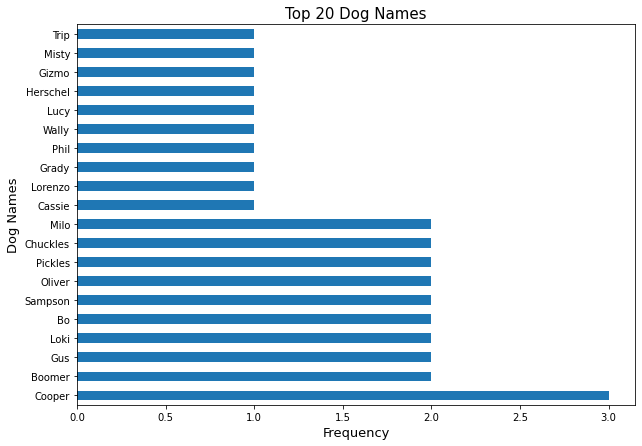

In [54]:
name_plot.plot(kind = 'barh', figsize=(10,7))
plt.xlabel('Frequency', size = 13)
plt.ylabel('Dog Names', size = 13)
plt.title('Top 20 Dog Names', size=15);

### Question 3: Which Dog breeds are most liked?
Let's see the dog breed liked the most popular. Lets use 'p1_dog-breed' for this. We use prediction 1 because its accuracy is much higher than the others. We shall limit this to a ranking of the Top 10.

In [55]:
liked_breeds = df_master.groupby('p1_dog-breed')['favorite_count'].sum()
top_liked = liked_breeds.nlargest(10)
top_liked

p1_dog-breed
golden_retriever      1238675.0
Pembroke               826357.0
Labrador_retriever     567789.0
Chihuahua              411968.0
French_bulldog         328039.0
Samoyed                289806.0
chow                   257474.0
cocker_spaniel         219923.0
Eskimo_dog             202296.0
malamute               195079.0
Name: favorite_count, dtype: float64

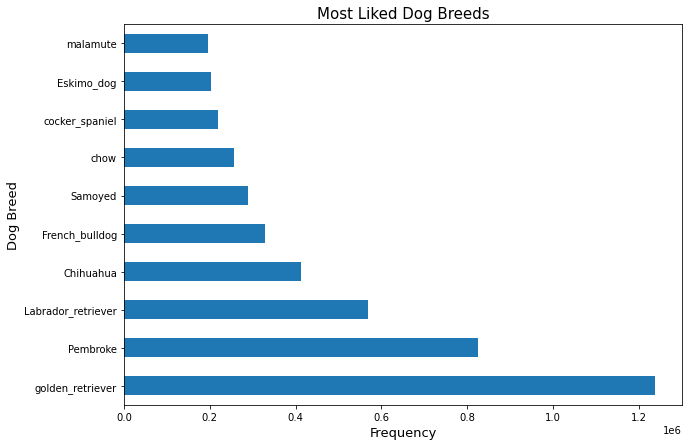

In [56]:
top_liked.plot(kind = 'barh', figsize=(10,7))
plt.xlabel('Frequency', size = 13)
plt.ylabel('Dog Breed', size = 13)
plt.title('Most Liked Dog Breeds', size=15);

> **Check out the wrangle report and the act report.**